# Single Electron Molecule in the Variational Approach

## Motivation

## Learning Goals

## Coding Concepts

## Background

We would like to understand the nature of a covalent, chemical bond.  This means we want to understand the energetics and spatial distributions of electrons that contribute to a covalent bond.  We will use the tools of quantum mechanics in the Schrodinger picture to achieve this.

If we consider the simplest neutral molecule, H$_2$, we have a Hamiltonian (in atomic units) that looks like
\begin{equation}
\hat{H}_{H_2} = -\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} -\frac{1}{2}\nabla_2^2 - \frac{1}{r_{2B}} - \frac{1}{r_{1B}} - \frac{1}{r_{2A}} + \frac{1}{r_{12}} + \frac{1}{R}
\end{equation}
where we label the two nuclei as $A$ and $B$ and the two electrons as $1$ and $2$ such that $r_{1A}$ is the distance between nucleus $A$ and electron 1.  

The term $\frac{1}{R}$ in the Hamiltonian above represents the Coulombic repulsion between the two positively charged nuclei.  In our picture, the nuclei are fixed in space (they have no kinetic energy) and thus the distance separating them, $R$, is also fixed.

We see that even in the Born-Oppenheimer picture of the hydrogen molecule, there are many terms we have to deal with.  We will start our discussion of molecules using a simpler model molecule: H$_2^+$.  This system has two nuclei but only one electron yielding the following Hamiltonian
\begin{equation}
\hat{H}_{H_2^+} = -\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} - \frac{1}{r_{1B}}  + \frac{1}{R}
\end{equation}

We will use the Variational Method to determine approximate ground state energies and wave functions for this system.

## Trial Wave Function for H$_2^+$

To start our variational approach we must propose a trial wave function.  We will use linear variational parameters and propose that the electron is sitting in a combination of 1s orbitals centered on each nucleus.  Namely we propose the trial wave function
\begin{equation}
\phi_t(\vec{r}_1;R) = c_1 \psi_{1s_A}(\vec{r}_1) + c_2 \psi_{1s_B}(\vec{r}_1)
\end{equation}
where $\psi_{1s_A}$ is the 1s hydrogen atom wave function centered at the $A$ nucleus and $\psi_{1s_B}$ is the 1s hydrogen atom wave function centered at the $B$ nucleus.


We will use the following shorthand in the remainder of these notes:
\begin{align}
\psi_{1s_A} &\rightarrow 1s_A \\
\psi_{1s_B} &\rightarrow 1s_B
\end{align}

The hydrogen atom wave functions are normalized
\begin{align}
\left\langle 1s_A | 1s_A \right\rangle &= 1 \\
\left\langle 1s_B | 1s_B \right\rangle &= 1
\end{align}
but note that there is no orthogonality relationship between 1s orbitals on two different nuclei
\begin{align}
\left\langle 1s_A | 1s_B \right\rangle \neq 0
\end{align}

Indeed it is the overlap of these two functions that will lead to any bonding behavior.  We will need to determine this (and other) integrals.

## Populating the $H$ and $S$ Matrices

To determine the variationally optimal energy and wave function, we need to determine the variationally optimal linear coefficients $c_1$ and $c_2$ of the trial wave function.  The procedure for this is to:

1. Posit the trial wave function (done)
2. Populate the $H$ and $S$ matrices
3. Diagonalize $S^{-1}H$. 

Here will will populate the $2\times 2$ matrices.  

### The Overlap Matrix $S$

We start with $S$:

\begin{align}
S = \begin{bmatrix} S_{11} & S_{12} \\ S_{12} & S_22 \end{bmatrix}
\end{align}
where 
\begin{align}
S_{11} &= \left\langle 1s_A | 1s_A \right\rangle \\
S_{12} &= \left\langle 1s_A | 1s_B \right\rangle \\
S_{22} &= \left\langle 1s_B | 1s_B \right\rangle
\end{align}

From normalization conditions, we know that
\begin{align}
S_{11} &= 1 \\
S_{22} &= 1
\end{align}a

We now set about determining $S_{12}$:
\begin{align}
S_{12} &= \left\langle 1s_A | 1s_B \right\rangle \\
&= \int 1s_A(\vec{r})1s_B(\vec{r})d\vec{r}
\end{align}
This integral is somewhat involved but can be solved.  Rather than doing so here I just provide the solution
\begin{equation}
S_{12} = e^{-R}\left(1+R+\frac{R^2}{3}\right)
\end{equation}

We note the $S_{12}$ is a function of nuclear separation $R$.  This makes sense as the degree of overlap between the two 1s function will depend on then separation distance between the nuclei.  We should expect no overlap when the nuclei are infinitely separated and maximal overlap when the nuclei are sitting on top of each other.  Below is a plot of $S_{12}(R)$.

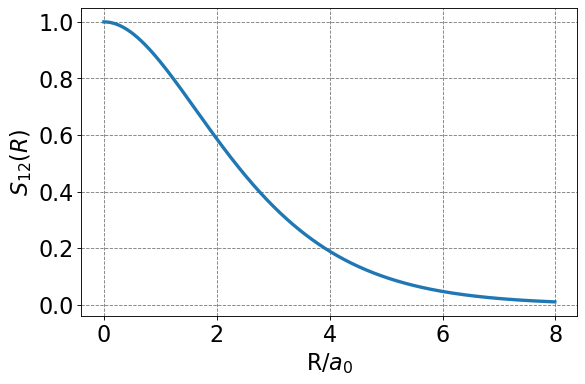

In [1]:
import numpy as np
def S12(R):
    return np.exp(-R)*(1+R+R**2/3)
import matplotlib.pyplot as plt
%matplotlib inline
R = np.arange(0,8,0.01)
plt.figure(figsize=(8,5),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
plt.plot(R,S12(R),lw=3)
plt.xlabel(r'R/$a_0$',fontsize=20)
plt.ylabel(r'$S_{12}(R)$',fontsize=20);

From this information we can populate the $S$ matrix as a function of $R$.  For example, if we choose $R=1.5$ $a_0$ we get and $S$ matrix of
\begin{equation}
\begin{bmatrix} 1 & 0.725 \\0.725 & 1 \end{bmatrix}
\end{equation}

Below is a code snippet to populate this matrix.

In [2]:
import numpy as np

def S(R):
    return np.array([[1,S12(R)],[S12(R),1]])

print("S(1.5) = ")
print(S(1.5))

S(1.5) = 
[[1.         0.72517302]
 [0.72517302 1.        ]]


### The Hamiltonian Matrix $H$:

The Hamiltonia matrix $H$ is more challenging.  We start with the definition

\begin{align}
H = \begin{bmatrix} H_{11} & H_{12} \\ H_{12} & H_22 \end{bmatrix}
\end{align}
where 
\begin{align}
H_{11} &= \left\langle 1s_A | \hat{H} | 1s_A \right\rangle \\
H_{12} &= \left\langle 1s_A | \hat{H} | 1s_B \right\rangle \\
H_{22} &= \left\langle 1s_B | \hat{H} | 1s_B \right\rangle
\end{align}

Each of these will need to be determined but we will be able to determine $H_{22}$ by analogy to $H_{11}$ since all we are doing in swapping the identity of the electron.
\begin{align}
H_{11} &= \left\langle 1s_A | \hat{H} | 1s_A \right\rangle \\
&= \int 1s_A(\vec{r}) \left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} - \frac{1}{r_{1B}}  + \frac{1}{R} \right) 1s_A(\vec{r})d\vec{r} \\
&= \int 1s_A(\vec{r}) \left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} \right) 1s_A(\vec{r})d\vec{r} + \int 1s_A(\vec{r}) \left(- \frac{1}{r_{1B}}  + \frac{1}{R} \right) 1s_A(\vec{r})d\vec{r} \\
&= E_{1s} + J
\end{align}
where we recognize that the first integral is simply the 1s energy of a hydrogen atom and we define the second integral as $J$, what is also called the *Coulomb integral*.  That is
\begin{align}
J &= \int 1s_A(\vec{r}) \left(- \frac{1}{r_{1B}}  + \frac{1}{R} \right) 1s_A(\vec{r})d\vec{r} \\
&= -\int 1s_A(\vec{r})\frac{1}{r_{1B}}1s_A(\vec{r})d\vec{r} + \int 1s_A(\vec{r})\frac{1}{R}1s_A(\vec{r})d\vec{r} \\
&= -\int 1s_A(\vec{r})\frac{1}{r_{1B}}1s_A(\vec{r})d\vec{r} + \frac{1}{R}
\end{align}
where that last integral becomes $\frac{1}{R}$ because $R$, the nuclear separation, is constant w.r.t $\vec{r}$ and the $1s_A$ function is normalized.

For the $H_2^+$ case the remaining integral in $J$ can be solved analytically.  Doing so yields
\begin{align}
J = e^{-2R}\left(1+\frac{1}{R}\right)
\end{align}

Thus, we get that 
\begin{align}
H_{11} & = E_{1s} + J = -\frac{1}{2} + e^{-2R}\left(1+\frac{1}{R}\right) \\
H_{22} & = E_{1s} + J = -\frac{1}{2} + e^{-2R}\left(1+\frac{1}{R}\right)
\end{align}

For $H_{12}$:
\begin{align}
H_{12} &= \left\langle 1s_A | \hat{H} | 1s_B \right\rangle \\
&= \int 1s_A(\vec{r}) \left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} - \frac{1}{r_{1B}}  + \frac{1}{R} \right) 1s_B(\vec{r})d\vec{r} \\
&= \int 1s_A(\vec{r}) \left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} \right) 1s_B(\vec{r})d\vec{r} + \int 1s_A(\vec{r}) \left(- \frac{1}{r_{1B}}  + \frac{1}{R} \right) 1s_B(\vec{r})d\vec{r} \\
&= E_{1s}S_{12} + K
\end{align}
where we recognize that $\left(-\frac{1}{2}\nabla_1^2 - \frac{1}{r_{1A}} \right) 1s_B = E_{1s}1s_B$, $S_{12} = \langle 1s_A | 1s_B\rangle$, and have defined
\begin{align}
K &= \int 1s_A(\vec{r}) \left(- \frac{1}{r_{1B}}  + \frac{1}{R} \right) 1s_B(\vec{r})d\vec{r} \\
&= -\int 1s_A(\vec{r})\frac{1}{r_{1B}}1s_B(\vec{r})d\vec{r} + \frac{S_{12}}{R} \\
&= -e^{-R}\left(1+R\right) + \frac{S_{12}}{R}
\end{align}
where the last stap I have used the solution for the left-most integral but not shown it to be true.  

We can now populate the $H$ matrix which I do below using code for $H(R=1.5)$:

In [3]:
import numpy as np

def H(R):
    J = np.exp(-2*R)*(1+1/R)
    K = S12(R)/R-np.exp(-R)*(1+R)
    H12 = H21 = -0.5*S12(R)+K
    H11 = H22 = -0.5+J
    return np.array([[H11,H12],[H21,H22]])

R = 1.5
print("H(1.5) = ")
print(H(R))

H(1.5) = 
[[-0.41702155 -0.43696323]
 [-0.43696323 -0.41702155]]


### Combined Solution

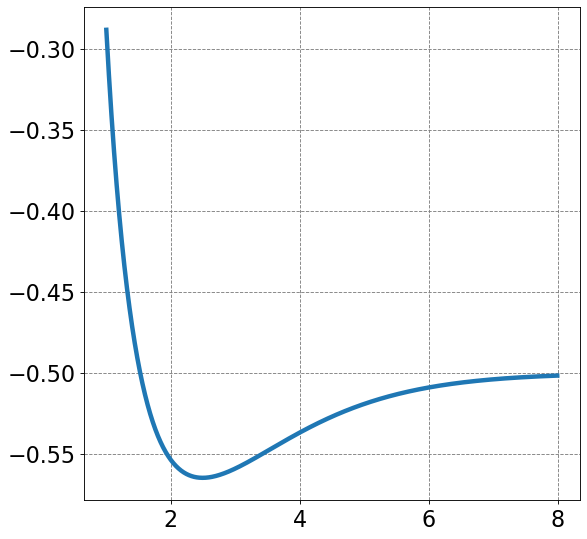

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
R = np.arange(1,8,0.01)
plt.figure(figsize=(8,8),dpi= 80, facecolor='w', edgecolor='k')
plt.tick_params(axis='both',labelsize=20)
plt.grid( which='major', axis='both', color='#808080', linestyle='--')
E = np.empty(R.size)
for i, r in enumerate(R):
    e, v = np.linalg.eig(np.dot(np.linalg.inv(S(r)),H(r)))
    E[i] = np.amin(e)
plt.plot(R,E,lw=4)